In [1]:
import pandas as pd
from prophet import Prophet

c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv("../../Data/HospitalityEmployees.csv")

In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

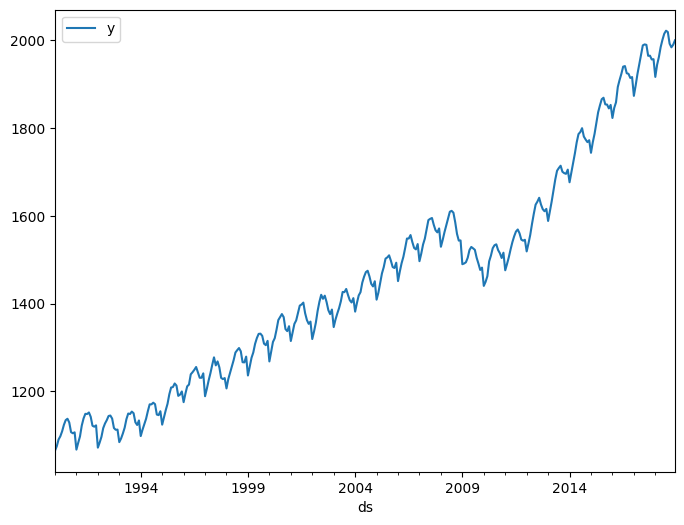

In [6]:
df.plot(x = 'ds', y ='y', figsize = (8,6))

In [7]:
## trend change most evident is at 2008 where there was some downward motion
## some trends cannot be seen with naked eye : ex seeing deeply at 1994 there was flat movement followed by increase

In [8]:
m = Prophet()

In [9]:
m.fit(df)

00:42:36 - cmdstanpy - INFO - Chain [1] start processing
00:42:36 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods = 12, freq = 'MS')

In [11]:
forecast  = m.predict(future)

In [13]:
from prophet.plot import add_changepoints_to_plot

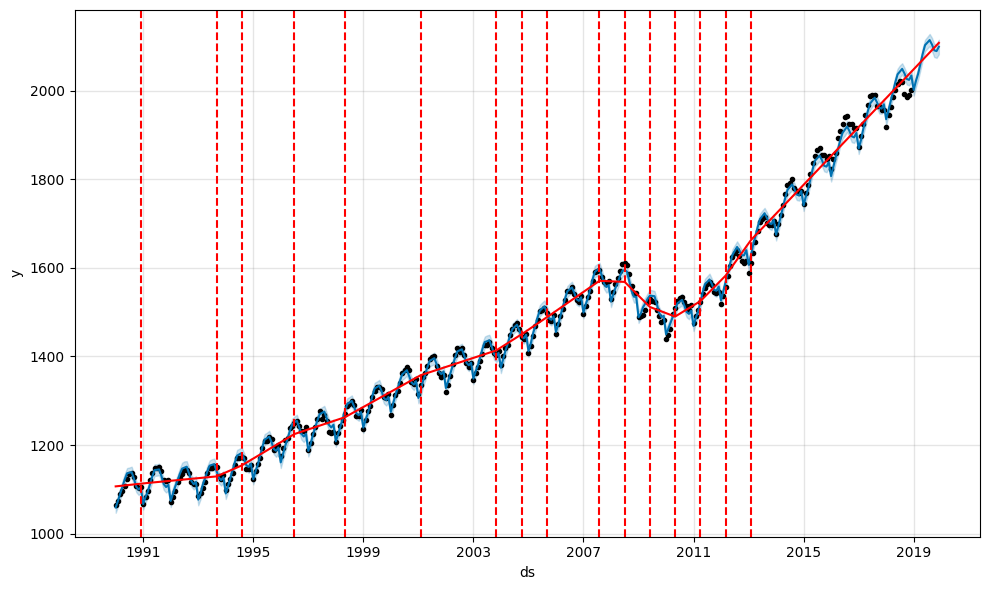

In [16]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [17]:
## shows the trend changes at these highlighted points

### seasonality 

In [18]:
df = pd.read_csv("../../Data/airline_passengers.csv")

In [19]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

00:57:43 - cmdstanpy - INFO - Chain [1] start processing
00:57:43 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


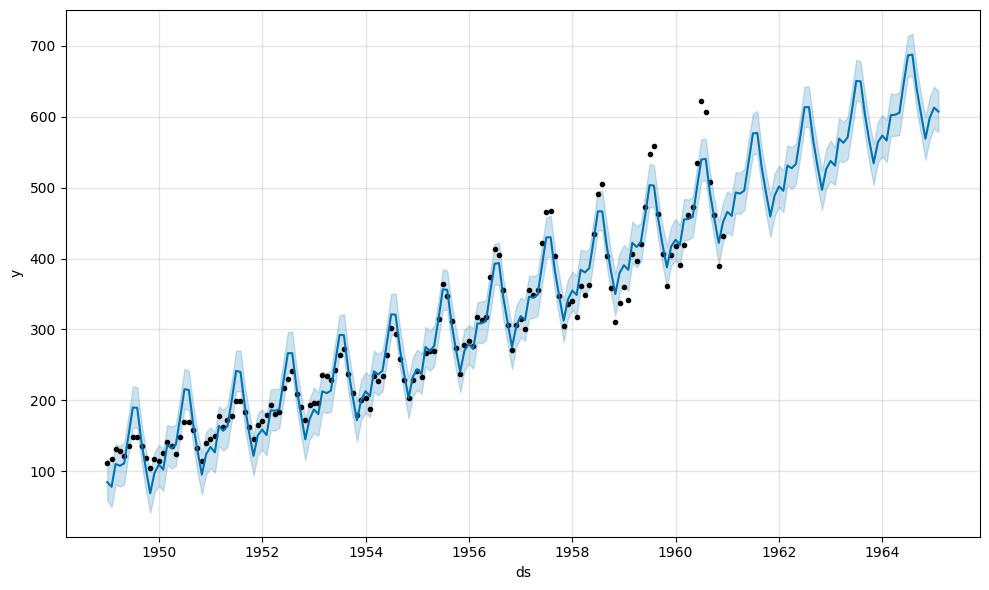

In [21]:
m = Prophet()
m.fit(df)
## 50 data points into the future
future = m.make_future_dataframe(50, freq = 'MS')
forecast = m.predict(future)
fig = m.plot(forecast)

c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

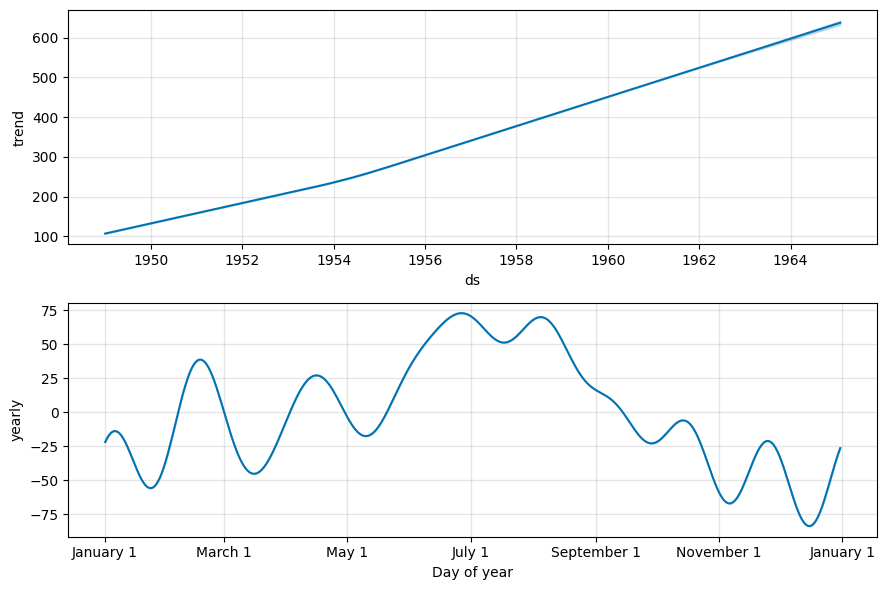

In [23]:
fig = m.plot_components(forecast);

In [24]:
## by default it uses sesaonliy as additive
## but if we look at the plot the seasonality is becoming wider with time

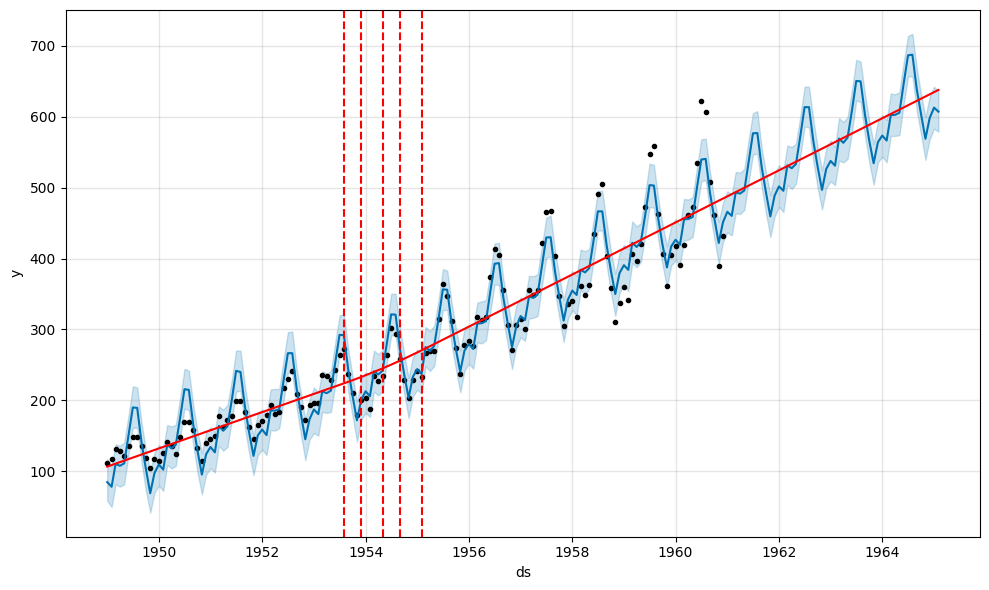

In [27]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m ,forecast)

01:04:09 - cmdstanpy - INFO - Chain [1] start processing
01:04:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


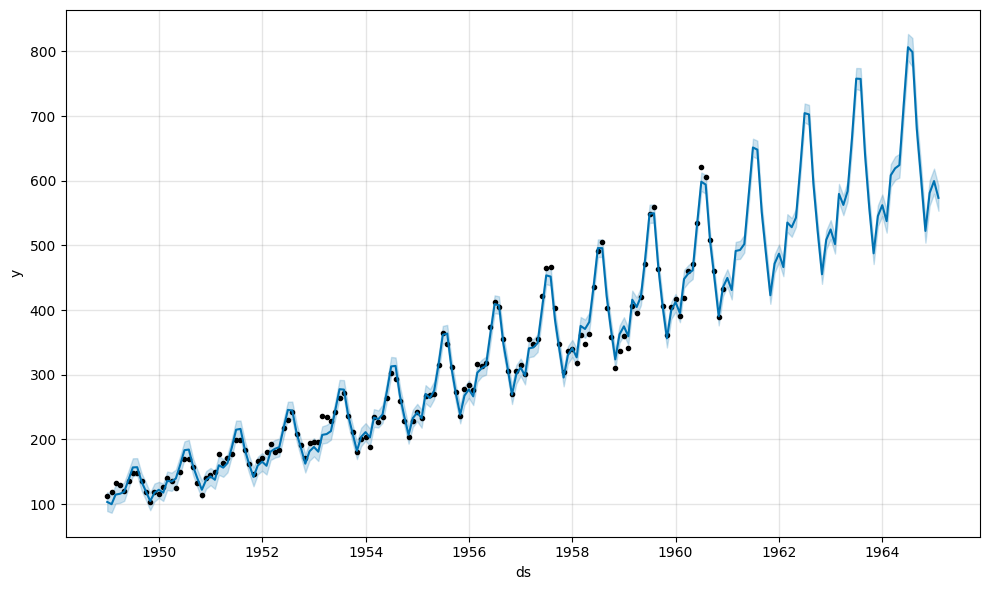

In [28]:
m = Prophet(seasonality_mode = 'multiplicative')
m.fit(df)
## 50 data points into the future
future = m.make_future_dataframe(50, freq = 'MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
## now more curves are passing through the points can be better solution

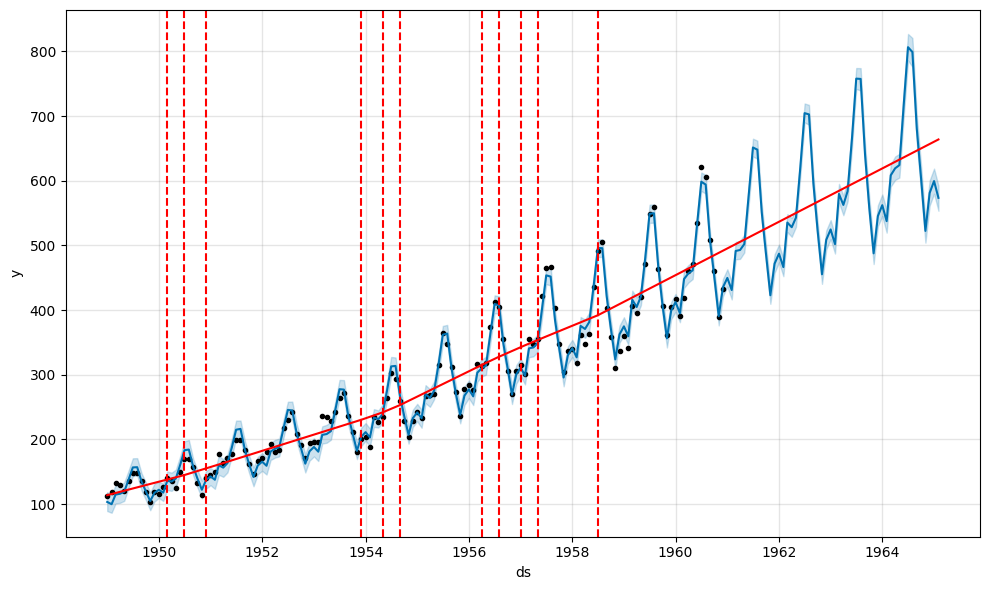

In [29]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m ,forecast)